In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from planit.autotrail import sandbox
import os

In [2]:


def trailproject_df(lat, lon, fname, reload=False):
    if (not os.path.isfile(fname)) or (reload):

        maxDistance = 30.0
        maxResults  = 500

        private_key = open('./../autotrail/privatekey.secret').read().strip()

        result = sandbox.getTrails(private_key,lat,lon, 
                                   maxDistance=maxDistance,
                                   maxResults=maxResults,
                                   minLength=1.25)
        df     = pd.DataFrame(result.json()['trails'])

        df.to_csv(fname)

    else:
        df = pd.read_csv(fname)
        
    return df


data_dict = {'Boulder' : {'lat' : 40.0274, 'lon' : -105.2519,
                          'fname':'boulder_trailproject.csv',
                          'df' : None},
            'San Gabriels' : {'lat':34.284886,'lon':-71.306092,
                               'fname':'san_gabriels_trailproject.csv',
                               'df':None},
            'White Mtns' : {'lat' :44.269039 ,'lon':-71.306092, 'fname' : 'white_mtns_trailproject.csv', 'df' : None},
            'Boise'      : {'lat' :43.6150 ,'lon':-116.2023, 'fname' : 'boise_trailproject.csv', 'df':None},
            'Bear Mtn'   : {'lat' :41.3129, 'lon':-74.0063,'fname' : 'bear_mtn_trailproject.csv','df':None}
            }

df_dict = {}
for k in data_dict.keys():
    df_dict[k] = trailproject_df(data_dict[k]['lat'],data_dict[k]['lon'],
                    data_dict[k]['fname'])
    data_dict[k]['df'] = df_dict[k]
    


In [3]:
df_dict['Boulder'].columns

Index(['Unnamed: 0', 'ascent', 'conditionDate', 'conditionDetails',
       'conditionStatus', 'descent', 'difficulty', 'high', 'id', 'imgMedium',
       'imgSmall', 'imgSmallMed', 'imgSqSmall', 'latitude', 'length',
       'location', 'longitude', 'low', 'name', 'starVotes', 'stars', 'summary',
       'type', 'url'],
      dtype='object')

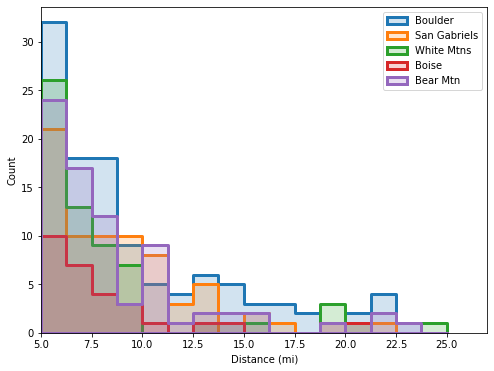

In [4]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

for i,k in enumerate(df_dict.keys()):
    sns.histplot(df_dict[k], x= 'length',
                 bins=np.arange(5, 26, 1.25),
                 color='C%i'%i, stat='count',fill = True, lw = 3,
                 ax=ax, label=k, element='step', alpha = 0.2)
                 #kde=True)
ax.legend(loc='best')
ax.set_xlabel('Distance (mi)')
ax.set_xlim([5, 27])

fig.savefig('trail_hist.png')

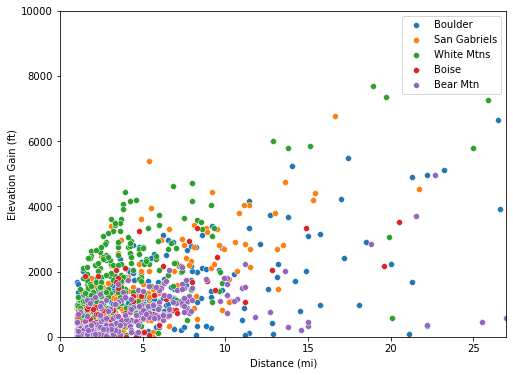

In [5]:
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(8,6)

for i,k in enumerate(df_dict.keys()):
    #print(k)
    sns.scatterplot(data=df_dict[k], 
                x= 'length',
                y = 'ascent',
                color='C%i'%i, #levels=5, thresh=.25,
                ax=ax, label=k)
ax.legend(loc='best')
ax.set_xlabel('Distance (mi)')

ax.set_ylabel('Elevation Gain (ft)')

ax.set_xlim([0, 27])
ax.set_ylim([0,10000])


fig.savefig('trail_kde.png')